In [68]:
import time
import numpy as np
import matplotlib.pyplot as plt

N = 100     # number of elements
Niter = 50  # number of iterations
sigma = 3   # standard deviation
at = 0.5    # value of parameter k
bt = 2      # value of parameter b

aa = 0
bb = 0
lmd1 = 0.000001  # lambda step1
lmd2 = 0.0005    # lambda step2

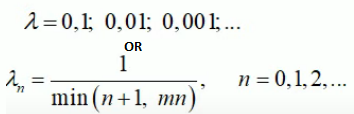

In [69]:
def E(y, a, b):
    ff = np.array([a * z + b for z in range(N)])
    return np.dot((y-ff).T, (y-ff))

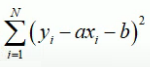

In [70]:
def dEda(y, a, b):
    ff = np.array([a * z + b for z in range(N)])
    return -2*np.dot((y - ff).T, range(N))

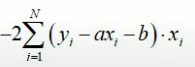

In [71]:
def dEdb(y, a, b):
    ff = np.array([a * z + b for z in range(N)])
    return -2*(y - ff).sum()

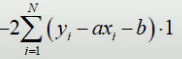

In [72]:
def an(aa, bb):
  return aa - lmd1 * dEda(y, aa, bb)

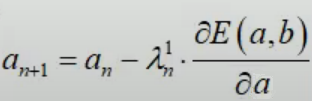

In [73]:
def bn(aa, bb):
  return bb - lmd2 * dEdb(y, aa, bb)

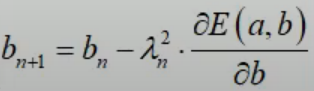

In [74]:
f = np.array([at*z+bt for z in range(N)])
print("f:", f)
y = np.array(f + np.random.normal(0, sigma, N))
print("y:", y)

a_plt = np.arange(-1, 2, 0.1)
print("a_plt:", a_plt)
b_plt = np.arange(0, 3, 0.1)
print("b_plt:", b_plt)
E_plt = np.array([[E(y, a, b) for a in a_plt] for b in b_plt])

f: [ 2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5
  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5 15.  15.5
 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5 21.  21.5 22.  22.5
 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5 28.  28.5 29.  29.5
 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5 35.  35.5 36.  36.5
 37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5 42.  42.5 43.  43.5
 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5 49.  49.5 50.  50.5
 51.  51.5]
y: [-0.12011911  2.50894758  1.84264244  3.22755681  4.48340852  1.45579183
  6.54122452  5.7414561   9.64527472  4.20908217 10.90178706  8.67436876
  9.00275157  6.47459195  5.764713    8.61467055 11.34362878 11.75765702
 11.75459648 13.67378873 13.82041589  8.08736949 10.46059634  8.48801181
 17.32277986 12.66263393 20.95692407  9.01513189 16.18430547 14.20883257
 14.22069861 15.77480851 13.69850208 16.69743916 16.24966966 18.80523612
 19.13603451 20.77490264 24.88238774 19.3719254

0.34104796626613537 0.91208279709338
0.44910011339407524 1.1980991861941197
0.48336285325099965 1.2859133740930095
0.4942558913836828 1.3110256044452289
0.49774686029414594 1.3163463156554338
0.4988926348801269 1.3154633715440123
0.49929472044219725 1.312678398311485
0.49946032765065806 1.3093521667203292
0.49955011029807506 1.305914134183575
0.4996149692030472 1.3024988533208839
0.49967104654566474 1.2991475176985052
0.4997234761200469 1.2958717892451725
0.4997739049046203 1.2926740111535349
0.49982287510947154 1.2895536083570474
0.4998705785684822 1.286509113718106
0.4999170956628861 1.2835388089257593
0.49996247099883917 1.2806409266996797
0.50000673738571 1.2778137140811974
0.5000499234412458 1.2750554517496613
0.5000920560111934 1.2723644594300378
0.5001331609464208 1.2697390969130014
0.500173263359603 1.2671777637024166
0.5002123877168332 1.264678898244601
0.5002505578767027 1.2622409770412126
0.5002877971124995 1.2598625137409691
0.5003241281288209 1.257542058239959
0.5003595730

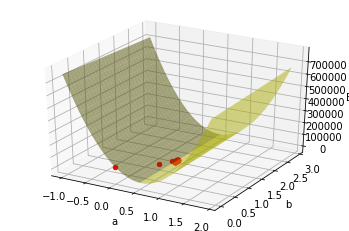

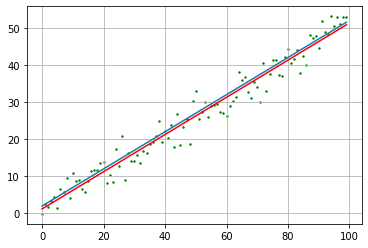

In [75]:
plt.ion()   # interactive mode on
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

a, b = np.meshgrid(a_plt, b_plt)
ax.plot_surface(a, b, E_plt, color='y', alpha=0.5)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('E')

point = ax.scatter(aa, bb, E(y, aa, bb), c='red') 

for n in range(Niter):
    aa = an(aa, bb)
    bb = bn(aa, bb)

    ax.scatter(aa, bb, E(y, aa, bb), c='red')

    # redraw
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.01)

    print(aa, bb)

plt.ioff()   # interactive mode on
plt.show()

# display approximation graphs
ff = np.array([aa*z+bb for z in range(N)])

plt.scatter(range(N), y, s=2, c='green')
plt.plot(f)
plt.plot(ff, c='red')
plt.grid(True)
plt.show()